# Car Evaluation

### Step 1: Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import joblib

### Step 2: Read Data

In [3]:
# Load the dataset
file_path = 'Car Evaluation.zip'

# Read the CSV file inside the zip
df = pd.read_csv(file_path)

# Display basic information and inspect the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

First few rows of the dataset:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


### Step 3: Basic Explorin of the Data

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


In [7]:
# Rename columns for clarity (use appropriate names based on dataset description)
df.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Acceptability']

# Display unique values for each column to understand categories
for col in df.columns:
    print(f"\nUnique values in '{col}': {df[col].unique()}")


Unique values in 'Buying': ['vhigh' 'high' 'med' 'low']

Unique values in 'Maint': ['vhigh' 'high' 'med' 'low']

Unique values in 'Doors': ['2' '3' '4' '5more']

Unique values in 'Persons': ['2' '4' 'more']

Unique values in 'Lug_boot': ['small' 'med' 'big']

Unique values in 'Safety': ['med' 'high' 'low']

Unique values in 'Acceptability': ['unacc' 'acc' 'vgood' 'good']


In [8]:
# Apply one-hot encoding to all categorical columns except the target ('Acceptability')
df_encoded = pd.get_dummies(df, columns=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety'], drop_first=True)

# Display the encoded dataset
print("\nOne-hot Encoded Dataset:")
print(df_encoded.head())



One-hot Encoded Dataset:
  Acceptability  Buying_low  Buying_med  Buying_vhigh  Maint_low  Maint_med  \
0         unacc       False       False          True      False      False   
1         unacc       False       False          True      False      False   
2         unacc       False       False          True      False      False   
3         unacc       False       False          True      False      False   
4         unacc       False       False          True      False      False   

   Maint_vhigh  Doors_3  Doors_4  Doors_5more  Persons_4  Persons_more  \
0         True    False    False        False      False         False   
1         True    False    False        False      False         False   
2         True    False    False        False      False         False   
3         True    False    False        False      False         False   
4         True    False    False        False      False         False   

   Lug_boot_med  Lug_boot_small  Safety_low  Safety_me

### Step 4: Split the Data

In [10]:
# Separate features and target
X = df_encoded.drop('Acceptability', axis=1)  # Features
y = df_encoded['Acceptability']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Testing sets created.")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training and Testing sets created.
Training set size: 1381 rows
Testing set size: 346 rows


### Step 5: Encode the Target Variable

In [11]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("\nEncoded Target Classes:")
print(label_encoder.classes_)



Encoded Target Classes:
['acc' 'good' 'unacc' 'vgood']


### Step 6: Train and Evaluate the Logistical Regression Model

In [12]:
# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))



Model Accuracy: 0.8960

Classification Report:
              precision    recall  f1-score   support

         acc       0.79      0.81      0.80        77
        good       0.44      0.27      0.33        15
       unacc       0.96      0.97      0.97       237
       vgood       0.72      0.76      0.74        17

    accuracy                           0.90       346
   macro avg       0.73      0.70      0.71       346
weighted avg       0.89      0.90      0.89       346



### Step 7: Confusion Matrix

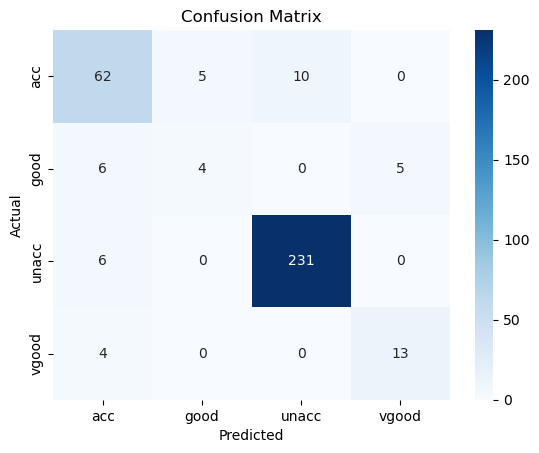

In [13]:
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Step 8: Train and Evaluate Randome Forest Model


Random Forest Model Accuracy: 0.8728

Random Forest Classification Report:
              precision    recall  f1-score   support

         acc       0.77      0.74      0.75        77
        good       0.25      0.13      0.17        15
       unacc       0.94      0.99      0.96       237
       vgood       0.64      0.53      0.58        17

    accuracy                           0.87       346
   macro avg       0.65      0.60      0.62       346
weighted avg       0.85      0.87      0.86       346



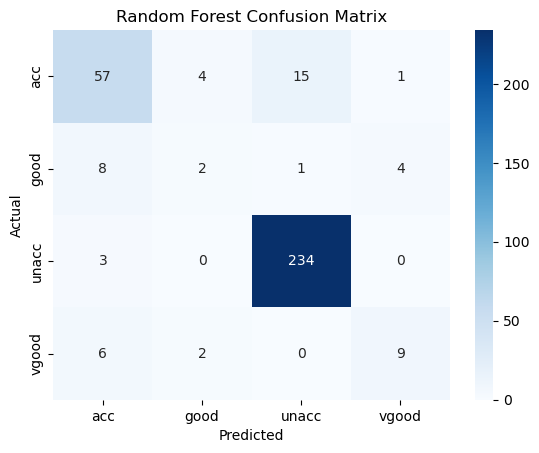

In [14]:
# Try Other Models

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train_encoded)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test_encoded, rf_y_pred)
print(f"\nRandom Forest Model Accuracy: {rf_accuracy:.4f}")

# Detailed classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_encoded, rf_y_pred, target_names=label_encoder.classes_))

# Confusion matrix
rf_conf_matrix = confusion_matrix(y_test_encoded, rf_y_pred)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Step 9: Feature Importance

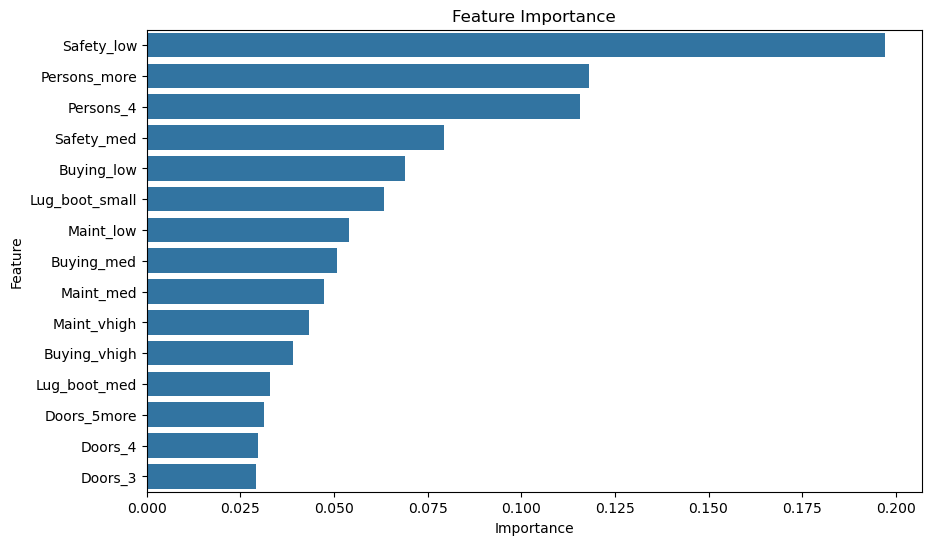

In [15]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


### Step 10: Save the model

In [16]:
joblib.dump(rf_model, 'car_acceptability_model.pkl')

# To load the model later
# loaded_model = joblib.load('car_acceptability_model.pkl')

['car_acceptability_model.pkl']